In [36]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns


In [5]:
df = pd.read_csv('ifood_df.csv')

In [6]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [7]:
df.isnull().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [8]:
print(df.duplicated().sum())

184


In [10]:
df = df.drop_duplicates()

In [11]:
print(df.duplicated().sum())

0


In [28]:
df.head(10)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
5,62513.0,0,1,16,520,42,98,0,42,14,...,1,0,0,0,0,1,0,702,688,0
6,55635.0,0,1,34,235,65,164,50,49,27,...,0,0,0,0,1,0,0,563,536,0
7,33454.0,1,0,32,76,10,56,3,1,23,...,0,0,0,0,0,0,1,146,123,0
8,30351.0,1,0,19,14,0,24,3,3,2,...,1,0,0,0,0,0,1,44,42,0
9,5648.0,1,1,68,28,0,6,1,1,13,...,1,0,0,0,0,0,1,36,23,1


In [33]:

def descriptive_analysis(df, column_names):
    for column_name in column_names:
        if column_name not in df.columns:
            print(f"Column '{column_name}' does not exist in the DataFrame.")
            continue
        
        # Calculate descriptive statistics
        mean = df[column_name].mean()
        median = df[column_name].median()
        mode = df[column_name].mode()[0]  # Take the first mode
        std_dev = df[column_name].std()
        
        avg_purchase_value = df['MntTotal'].mean()
        avg_recency = df['Recency'].mean()
        median_recency = df['Recency'].median()
    
        # Percentage of customers accepting a campaign
        campaign_acceptance_rate = (df['AcceptedCmpOverall'].sum() / len(df)) * 100
    
        # Print the summary statistics
        print("Descriptive Statistics for Key Metrics:")
        print(f"\nDescriptive Analysis for '{column_name}':")
        print(f"Mean: {mean}")
        print(f"Median: {median}")
        print(f"Mode: {mode}")
        print(f"Standard Deviation: {std_dev}")
        print("-" * 40)
        print("\nAdditional Insights:")
        print(f"Average Purchase Value (Total): {avg_purchase_value:.2f}")
        print(f"Average Recency (Days since last purchase): {avg_recency:.2f}")
        print(f"Median Recency (Days since last purchase): {median_recency:.2f}")
        print(f"Campaign Acceptance Rate: {campaign_acceptance_rate:.2f}%")


In [34]:
columns_to_analyze = ['Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits']
descriptive_analysis(df, columns_to_analyze)

Descriptive Statistics for Key Metrics:

Descriptive Analysis for 'Kidhome':
Mean: 0.4433448787728847
Median: 0.0
Mode: 0
Standard Deviation: 0.5361962607195718
----------------------------------------

Additional Insights:
Average Purchase Value (Total): 563.79
Average Recency (Days since last purchase): 48.88
Median Recency (Days since last purchase): 49.00
Campaign Acceptance Rate: 30.23%
Descriptive Statistics for Key Metrics:

Descriptive Analysis for 'Teenhome':
Mean: 0.5096486887679367
Median: 0.0
Mode: 0
Standard Deviation: 0.5463931465334511
----------------------------------------

Additional Insights:
Average Purchase Value (Total): 563.79
Average Recency (Days since last purchase): 48.88
Median Recency (Days since last purchase): 49.00
Campaign Acceptance Rate: 30.23%
Descriptive Statistics for Key Metrics:

Descriptive Analysis for 'Recency':
Mean: 48.880752102919345
Median: 49.0
Mode: 56
Standard Deviation: 28.950916650075275
----------------------------------------

Addi

In [29]:
    avg_purchase_value = df['MntTotal'].mean()
    avg_recency = df['Recency'].mean()
    median_recency = df['Recency'].median()

    # Percentage of customers accepting a campaign
    campaign_acceptance_rate = (df['AcceptedCmpOverall'].sum() / len(df)) * 100

    # Print the summary statistics
    print("Descriptive Statistics for Key Metrics:")
    print("\nAdditional Insights:")
    print(f"Average Purchase Value (Total): {avg_purchase_value:.2f}")
    print(f"Average Recency (Days since last purchase): {avg_recency:.2f}")
    print(f"Median Recency (Days since last purchase): {median_recency:.2f}")
    print(f"Campaign Acceptance Rate: {campaign_acceptance_rate:.2f}%")


Descriptive Statistics for Key Metrics:

Additional Insights:
Average Purchase Value (Total): 563.79
Average Recency (Days since last purchase): 48.88
Median Recency (Days since last purchase): 49.00
Campaign Acceptance Rate: 30.23%


In [44]:
#creating the k-mean cluster 

In [45]:
df.head()


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [85]:
x = df[['Income','MntTotal']]
x

,Income,MntTotal
0,58138.0,1529
1,46344.0,21
2,71613.0,734
3,26646.0,48
4,58293.0,407
...,...,...
2198,26816.0,19
2200,61223.0,1094
2202,56981.0,1217
2203,69245.0,782


In [86]:
from sklearn.cluster import KMeans

In [92]:
wcss = []
for i in range(1,20):
    kmean = KMeans(n_clusters=i, init='k-means++', random_state=20)
    kmean.fit(x)
    wcss.append(kmean.inertia_)
  


In [111]:

wcss


[867313182165.8608,
 246505491437.86414,
 125545966545.72163,
 75178637113.3808,
 50062422774.234024,
 37661602758.5706,
 28936075240.29927,
 22478849129.045033,
 17404542084.666027,
 14942397888.984356,
 12376875615.228031,
 10390964300.839283,
 8984711360.8746,
 8090665405.444758,
 7543954271.998054,
 6081884531.71847,
 5480158326.753028,
 5077215052.929365,
 4311827346.714809]

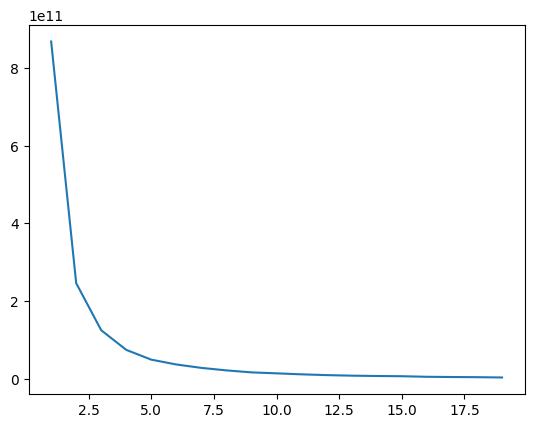

In [112]:
plt.plot (range(1,20),wcss)


In [113]:
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model
kmeans.fit(x)

# Get cluster labels
labels = kmeans.labels_

In [114]:
kmean = KMeans(n_clusters= 3, init='k-means++',random_state = 30)
kmean.fit(x)
x = x.copy() 
x['cluster_number'] = kmean.fit_predict(x)


In [115]:
print(x)

       Income  MntTotal  claster_number  cluster_number
0     58138.0      1529               2               2
1     46344.0        21               2               2
2     71613.0       734               1               1
3     26646.0        48               0               0
4     58293.0       407               2               2
...       ...       ...             ...             ...
2198  26816.0        19               0               0
2200  61223.0      1094               2               2
2202  56981.0      1217               2               2
2203  69245.0       782               1               1
2204  52869.0       151               2               2

[2021 rows x 4 columns]


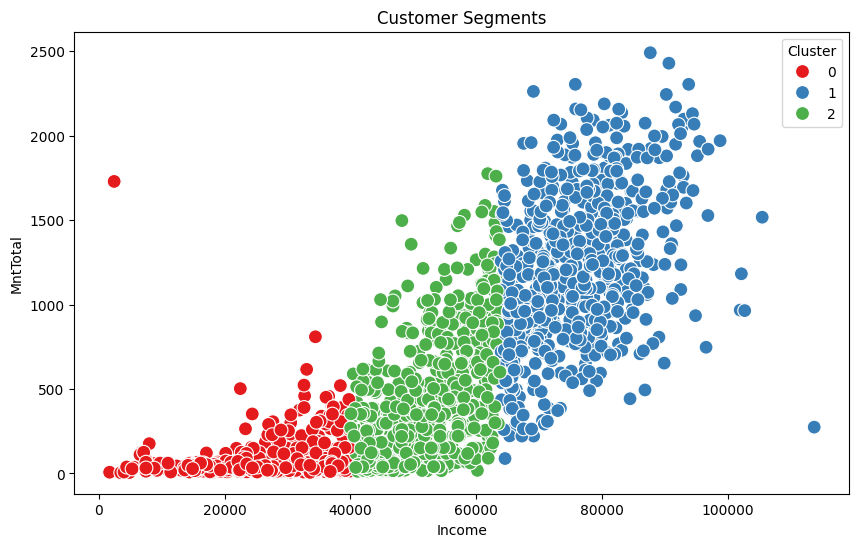

In [134]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='MntTotal', hue='cluster_number', data=x, palette='Set1', s=100)

plt.title('Customer Segments')
plt.xlabel('Income')
plt.ylabel('MntTotal')
plt.legend(title='Cluster')
plt.show()

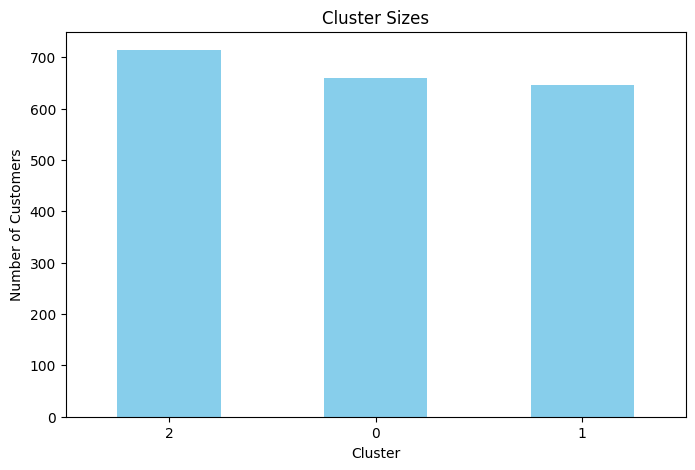

In [136]:
cluster_sizes = x['cluster_number'].value_counts()

plt.figure(figsize=(8, 5))
cluster_sizes.plot(kind='bar', color='skyblue')

plt.title('Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()